In [4]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tweepy
import os
import sys
from tweepy import Stream
from tweepy.streaming import StreamListener
from tweepy import API
from tweepy import OAuthHandler

consumer_key = "XXX"
consumer_secret = "XXX"
access_token = "XXXP"
access_token_secret = "XXX"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth) 
      
class MyListener(StreamListener):
    
    def on_data(self, data):
        try:
            with open('term_project_12.json', 'a') as f:
                f.write(data)
                return True
        except BaseException as e:
            print("Error on_data: %s" % str(e))
        return True
 
    def on_error(self, status):
        print(status)
        return True
 
twitter_stream = Stream(auth, MyListener())
twitter_stream.filter(track=['#covid19', '#covid', '#coronavirus'], languages = ['en'])

KeyboardInterrupt: 

In [2]:
from nltk.tokenize import word_tokenize
import operator 
import json
from collections import Counter 
import re
import pandas as pd
import numpy as np
emoticons_str = r"""
    (?:
        [:=;] 
        [oO\-]? 
        [D\)\]\(\]/\\OpP] 
    )"""

emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+",flags=re.UNICODE )
regex_str = [
    emoticons_str,
    r'<[^>]+>', 
    r'(?:@[\w_]+)', 
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", 
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', 
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', 
    r"(?:[a-z][a-z'\-_]+[a-z])", 
    r'(?:[\w_]+)', 
    r'(?:\S)' 
]
    
tokens_regex = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)


def tokenize(s):
    return tokens_regex.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoji_pattern.search(token) else token.lower() for token in tokens]
    return tokens

from nltk.corpus import stopwords
import string
 
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['#COVID19','COVID','#COVID','#COVIDー19','#covid19','#Covid19','#coronavirus']
#file_name = 'term_project_11.json'
with open(file_name, 'r') as file:
    count_all=Counter()
    for line in file:
        tweet = json.loads(line)
        #terms_all = [term for term in preprocess(tweet["text"])]
        try:
            terms_stop = [term for term in preprocess(tweet['text']) if term not in stop]
        except KeyError: continue
        count_all.update(terms_stop)
    # Print the first 25 most frequent words
    df=pd.DataFrame(count_all.most_common(25), columns=['Terms','Count'])
    df.index = np.arange(1, len(df)+1)
    print(df)

            Terms  Count
1             amp  18573
2           cases  11066
3          people  10212
4             new   9221
5     @DrEricDing   9074
6        pandemic   9022
7         vaccine   8885
8            died   7330
9          deaths   6605
10         health   5467
11           Need   5216
12           help   5200
13           work   4896
14    @Cleavon_MD   4666
15          state   4607
16           mask   4453
17        workers   4262
18          today   4087
19         review   3878
20            New   3873
21         spread   3840
22  @narendramodi   3827
23           like   3810
24              📌   3789
25        Biotech   3761


In [16]:
stop = stopwords.words('english') + stopwords.words('spanish')+ stopwords.words('french') + stopwords.words('portuguese') + punctuation + ['3','gr','perdi','dolor','Su','informamos','lucha','Con','ó','á','—','es','In','día','del','Los','RT','da','El','2','1','🇷','Venezuela','ु','#FidelPorSiempre','A','con','La','”','al','por','las','por', 'via','Cuomo','This','The','I','...','त','ini','kes','ि','ह','tinggi','24','hari','Terkini','sembuh','tingg','juga','1,673','य','द','ल','म','न','स','र','de','la','en','el','que','’','ा','…','े','क','ी','्','ो','ं','But','“','à','ón','les','️','un','se','And','h','le','los','Kes']
#file_name = 'term_project_5.json'
with open(file_name, 'r') as file:
    count_all=Counter()
    for line in file:
        tweet = json.loads(line)
        #terms_all = [term for term in preprocess(tweet["text"])]
        try:
            terms_stop = [term for term in preprocess(tweet['text']) if term not in stop]
        except KeyError: continue
        count_all.update(terms_stop)
    # Print the first 25 most frequent words
    df=pd.DataFrame(count_all.most_common(25), columns=['Terms','Count'])
    df.index = np.arange(1, len(df)+1)
    print(df)

           Terms  Count
1       #COVID19  88969
2            amp  12630
3       #Covid19  11367
4   #coronavirus  11307
5         people   9847
6          cases   8806
7            new   7996
8         #COVID   7812
9             19   7586
10   @DrEricDing   7298
11      #covid19   7160
12         COVID   6976
13       Gracias   6276
14     Americans   6004
15            11   5247
16        health   4979
17         casos   4780
18  Thanksgiving   4574
19        México   4373
20     @HLGatell   4370
21        deaths   4353
22      pandemia   4256
23          2020   4204
24        vacuna   4135
25      pandemic   4132


In [14]:
pip install vincent

Note: you may need to restart the kernel to use updated packages.


In [3]:
import vincent

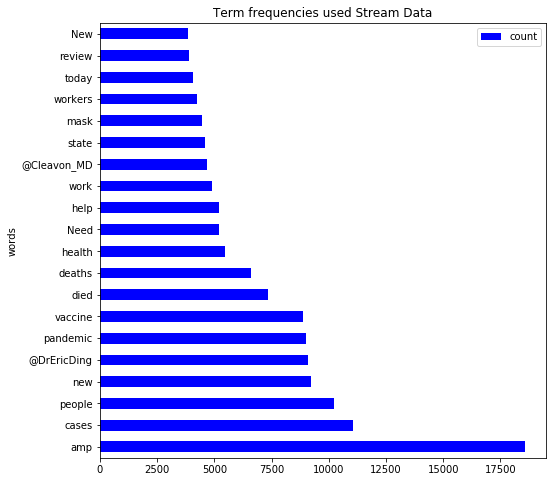

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

clean_tweets_no_urls = pd.DataFrame(count_all.most_common(20), columns=['words', 'count'])

clean_tweets_no_urls.head()
fig, ax = plt.subplots(figsize=(8, 8))
clean_tweets_no_urls.plot(kind='barh',x='words', y='count', ax=ax, color="blue")
plt.title('Term frequencies used Stream Data')
plt.show()

In [5]:
import pandas
import json

dates_covid19 = []
#file_name = 'term_project_5.json'
with open(fname, 'r') as file:
    for line in file:
        tweet = json.loads(line)
        try:
            terms_hash = [term for term in preprocess(tweet['text']) if term.startswith('#')]
        # track when the hashtag is mentioned
            if ('#COVID19' or '#Covid19' or '#COVID' or '#covid19' or '#Covid' or '#coronavirus' or '#COVIDー19') in terms_hash:
                dates_covid19.append(tweet['created_at'])
        except KeyError: continue 

ones = [1]*len(dates_covid19)
idx = pandas.DatetimeIndex(dates_covid19)
Covid19 = pandas.Series(ones, index=idx)
per_minute = Covid19.resample('1Min').sum().fillna(0)

64044


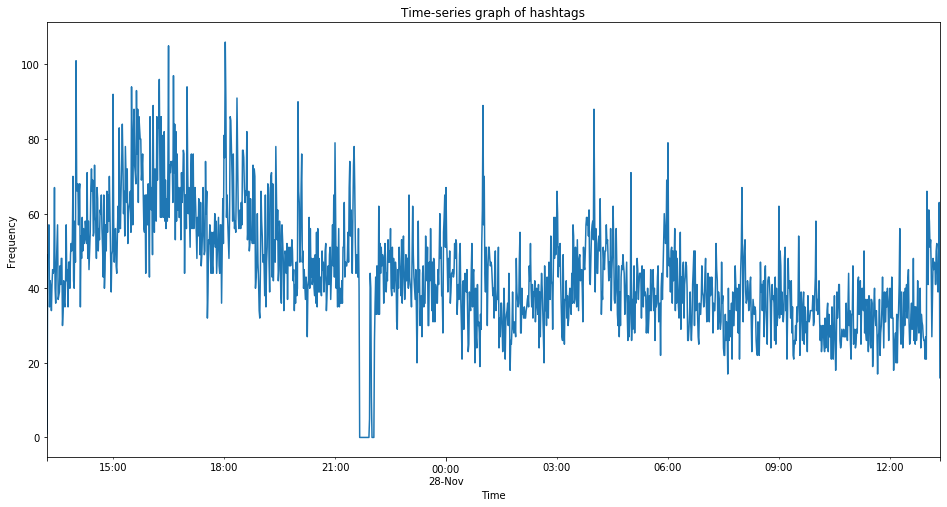

In [8]:
import matplotlib.pyplot as plt
print(Covid19.count())
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_xlabel('Time')
ax.set_ylabel('Frequency')
ax.set_title('Time-series graph of hashtags')
per_minute.plot()


In [19]:
pip install folium

     |████████████████████████████████| 93 kB 1.7 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [3]:
import json
from argparse import ArgumentParser

with open('term_project_11.json', 'r') as file:
        geo_data = {
        'type' : "FeatureCollection",
        'features' : []
        }

        for line in file:
            tweet = json.loads(line)
            try:
                if tweet['coordinates']:
                    geo_json_feature = {
                        "type" : "Feature",
                        "geometry": {
                        "type" : "Point",
                        "coordinates" : tweet['coordinates']['coordinates']
                        },
                        "properties": {
                        "text" : tweet['text'],
                        "created_at" : tweet['created_at']
                        }
                    }
                    geo_data['features'].append(geo_json_feature)
            except KeyError:
                continue
    #Save geo data
with open('map_11.geojson', 'w') as fileout:
        fileout.write(json.dumps(geo_data, indent=4))

In [4]:
import folium
from folium.plugins import MarkerCluster
import json

tweet_map = folium.Map(Location=[50, 5], max_zoom=20)

marker_cluster = MarkerCluster().add_to(tweet_map)

geodata= json.load(open('map_11.geojson'))

for tweet in geodata['features']:
        tweet['geometry']['coordinates'].reverse()
        marker = folium.Marker(tweet['geometry']['coordinates'], popup=tweet['properties']['text'])
        marker.add_to(marker_cluster)
        
tweet_map.save('map.html')

